In [2]:
%load_ext autoreload
%autoreload 2

home_or_office = "home"

import sys
if home_or_office =="home":
    sys.path.extend(['C:\\Code\\Libraries', 'C:/Code/Libraries'])
else:
    sys.path.extend(['C:\\Users\\troy\\Documents\\Code\\Libraries', 'C:\\Users\\troy\\Documents\\Excel Sheets', 
                     'C:/Users/troy/Documents/Code/Libraries'])

from datetime import date, datetime
import os
import numpy as np
import pandas as pd
import collections

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from tia.bbg import LocalTerminal

import FinAPI.Utilities.PlotlyCharting as plotlyUtils

pio.renderers.default = "vscode"

### Future Object

In [4]:
from FinAPI.BondFutureOption.BondFutSurface import FuturesData

today = datetime.today()
yest = date(2023, 12, 5)
future_code = "FVH24"

NameError: name 'BondOptionTicker' is not defined

In [3]:
# create the futures object, the second argument is to update hitory
objFut = FuturesData(future_code, True)

# Properties - live current values of the snap
print(objFut.snap_mid, objFut.fwddv01, objFut.spotdv01, objFut.ytm, objFut.open_interest, objFut.volume)

# For getting a historical snap - First snap the market at the particular date
hist_snap = objFut.snap(data_dt=datetime(2023, 11, 14))

# Then use the same properties as above to access the values of the snap
print(objFut.snap_mid, objFut.fwddv01, objFut.spotdv01, objFut.ytm, objFut.open_interest, objFut.volume)

# History Dataframe
hist_df = objFut.price_candles

[2023-12-01 21:51:22,500] DEBUG [HistoryManager] [HistoryManager.py] [read_ticker_ts][184] [PID:2228 TID:15708] Cannot find the file C:\Code\Libraries\FinAPI\HistoricalData\Data\AdhocHistory\FVH24_PX_OPEN.csv corresponding to the ticker FVH24 COMDTY
[2023-12-01 21:51:22,503] ERROR [HistoryMaager] [HistoryMaager.py] [get_history][648] [PID:2228 TID:15708] 'NoeType' object has o attribute 'ame'
'Traceback (most recet call last):\  File "C:\\Code\\Libraries\\FiAPI\\HistoricalData\\HistoryMaager.py", lie 624, i get_history\    ts.ame = ticker.split()[0]\AttributeError: \'NoeType\' object has o attribute \'ame\''
[2023-12-01 21:51:22,508] DEBUG [HistoryManager] [HistoryManager.py] [update_history_csv][479] [PID:2228 TID:15708] BloombergHistory: Updating History for bbg ticker: FVH24 COMDTY
[2023-12-01 21:51:22,515] DEBUG [HistoryManager] [HistoryManager.py] [update_history_csv][499] [PID:2228 TID:15708] --- using def_start , start and end dates as 1901-01-01 00:00:00, None and 2023-12-01
[2

106.91015625 4.077577490124317 4.367028472879476 0.042430068612738986 5795981 406039.0
106.4765625 4.058246708632247 4.389893235412112 0.04349595860614491 129106.0 73327.0


In [4]:
objFut.debug_print()

----- Raw SNAP ------
{'PX_OPEN': 105.3828125, 'PX_HIGH': 106.515625, 'PX_LOW': 105.375, 'PX_LAST': 106.4765625, 'PX_VOLUME': 73327.0, 'OPEN_INT': 129106.0, 'FUT_CTD_CUSIP': '91282CHE', 'FUT_CNVS_FACTOR': 0.9135, 'FUT_IMPLIED_REPO_RT': 5.05539, 'FUT_ACTUAL_REPO_RT': 5.403, 'CONVENTIONAL_CTD_FORWARD_FRSK': 4.0582, 'VALUE_DT': datetime.datetime(2023, 11, 14, 0, 0), 'PRICE': 106.4765625}
------- Indiv Properties ------
106.4765625 4.058246708632247 4.389893235412112 0.04349595860614491 5.05539 129106.0 73327.0


In [5]:
hist_df.head()

df = hist_df.dropna()
# get the cart
fig = plotlyUtils.create_candlestick(hist_df, ohlc_cols=['OPEN', 'HIGH', 'LOW', 'CLOSE'])
# plot the chart
fig.show()

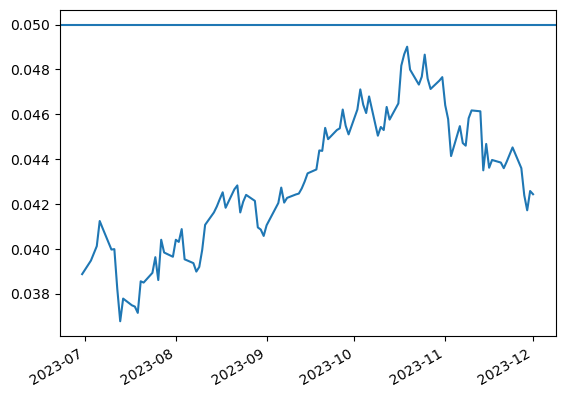

In [6]:
import matplotlib.pyplot as plt
objFut.fwd_yield_history.plot()
plt.axhline(0.05)

In [72]:
def parse_option_ticker(option_ticker):
    """
    Parse a bloomberg ticker into the components - strike, type_code, fut_code, exp_code, month_code, year_code,
    weeknum, is_wedweekly

    :param option_ticker: bbg ticker of the type TYJ1C <strike> Comdty or TYWF21C2 <strike> Comdty
    :return: dictionary containing the parsed params
    """
    parts = option_ticker.split(' ')
    strike = float(parts[1])
    if len(parts[0]) == 8:
        # e.g, TYWF21C2, this is a wednesday weekly code
        # The format of the ticker is <base:2><W><MonthCode:1><YY:2><Flavor:1><Weeknum:1> <Strike> Comdty
        ticker_code = parts[0]
        fut_code = ticker_code[:2]
        typ_code = ticker_code[6:7]
        month_code = ticker_code[3:4]
        year_code = ticker_code[4:6]
        weeknum = ticker_code[7:8]
        is_wedweekly = True
        exp_code = "W_" + ticker_code[3:6] + '_' + ticker_code[-1]
    else:
        # e.g, TYJ1, TYH1, 1MF1, 2MG1 is a serial, quarterly or friday weekly
        fut_code = parts[0][:2]
        typ_code = parts[0][-1]
        exp_code = parts[0][:-1]
        month_code = parts[0][2:3]
        year_code = parts[0][3:4]
        weeknum = None
        is_wedweekly = False
    return dict(strike=strike, typ_code=typ_code, fut_code=fut_code, exp_code=exp_code,
                month_code=month_code, year_code=year_code, weeknum=weeknum, is_wedweekly=is_wedweekly)

ticker = "1MZ4C 107 Comdty"
parse_option_ticker(ticker)

{'strike': 107.0,
 'typ_code': 'C',
 'fut_code': '1M',
 'exp_code': '1MZ4',
 'month_code': 'Z',
 'year_code': '4',
 'weeknum': None,
 'is_wedweekly': False}

### Option Data

In [23]:
objFut.snap()
objFut.snap_mid

107.6171875

In [24]:
from FinAPI.BondFutureOption.BondFutSurface import OptionBBGDataSource

valid_expiries = OptionBBGDataSource.retrive_valid_tickers(objFut, objFut.snap_mid, objFut.today, True)

[2023-12-03 02:13:04,998] DEBUG [NxFreeBondFutOpt] [BondFutSurface.py] [retrive_valid_tickers][540] [PID:2228 TID:15708] 
[2023-12-03 02:13:05,001] DEBUG [NxFreeBondFutOpt] [BondFutSurface.py] [retrive_valid_tickers][555] [PID:2228 TID:15708] Possible tickers: ['1IG4P 108 Comdty', '1IF4P 108 Comdty', '1IZ3P 108 Comdty', '1IX3P 108 Comdty', '2IG4P 108 Comdty', '2IF4P 108 Comdty', '2IZ3P 108 Comdty', '2IX3P 108 Comdty', '3IG4P 108 Comdty', '3IF4P 108 Comdty', '3IZ3P 108 Comdty', '3IX3P 108 Comdty', '4IG4P 108 Comdty', '4IF4P 108 Comdty', '4IZ3P 108 Comdty', '4IX3P 108 Comdty', '5IG4P 108 Comdty', '5IF4P 108 Comdty', '5IZ3P 108 Comdty', '5IX3P 108 Comdty', 'FVF4P 108 Comdty', 'FVG4P 108 Comdty', 'FVH4P 108 Comdty', 'FVWG24C1 108 Comdty', 'FVWG24C2 108 Comdty', 'FVWG24C3 108 Comdty', 'FVWG24C4 108 Comdty', 'FVWG24C5 108 Comdty', 'FVWF24C1 108 Comdty', 'FVWF24C2 108 Comdty', 'FVWF24C3 108 Comdty', 'FVWF24C4 108 Comdty', 'FVWF24C5 108 Comdty', 'FVWZ23C1 108 Comdty', 'FVWZ23C2 108 Comdty', 'F

In [25]:
valid_expiries

,last_tradeable_dt,opt_first_trade_dt,OPT_UNDL_TICKER,REAL_UNDERLYING_TICKER,expiry_type,strike_spread,tickers,days_to_expiry,year_fracs,exp_code
2023-12-01,2023-12-01,2023-11-06,1IH4,FVH4,Friday Weekly,0.25,1IZ3P 108 Comdty,0,0.000000,1IZ3
2023-12-06,2023-12-06,2023-11-24,FVWH4,FVH4,Wednesday Weekly,0.25,FVWZ23C1 108 Comdty,5,0.013699,W_Z23_1
2023-12-08,2023-12-08,2023-11-13,2IH4,FVH4,Friday Weekly,0.25,2IZ3P 108 Comdty,7,0.019178,2IZ3
2023-12-13,2023-12-13,2023-11-30,FVWH4,FVH4,Wednesday Weekly,0.25,FVWZ23C2 108 Comdty,12,0.032877,W_Z23_2
2023-12-15,2023-12-15,2023-11-20,3IH4,FVH4,Friday Weekly,0.25,3IZ3P 108 Comdty,14,0.038356,3IZ3
2023-12-22,2023-12-22,2023-07-24,FVH4,FVH4,Serial Quarterly,0.25,FVF4P 108 Comdty,21,0.057534,FVF4
2024-01-26,2024-01-26,2023-09-25,FVH4,FVH4,Serial Quarterly,0.25,FVG4P 108 Comdty,56,0.153425,FVG4
2024-02-23,2024-02-23,2023-07-03,FVH4,FVH4,Serial Quarterly,0.25,FVH4P 108 Comdty,84,0.230137,FVH4


In [37]:
ticker_dict, strike_universe = OptionBBGDataSource.create_tickers_vol_surface(objFut, objFut.snap_mid, valid_expiries)

[2023-12-03 02:50:24,099] DEBUG [NxFreeBondFutOpt] [BondFutSurface.py] [create_tickers_vol_surface][683] [PID:2228 TID:15708] strike universe: {108.75, 109.25, 109.5, 105.5, 106.0, 106.5, 105.75, 106.25, 106.75, 107.0, 107.25, 107.5, 107.75, 108.0, 108.25, 108.5, 109.0}


0.040988161257759184 0.03598816125775919 0.04598816125775918
0.040988161257759184 0.03598816125775919 0.04598816125775918
0.040988161257759184 0.03598816125775919 0.04598816125775918
0.040988161257759184 0.03598816125775919 0.04598816125775918
0.040988161257759184 0.03598816125775919 0.04598816125775918
0.040988161257759184 0.03598816125775919 0.04598816125775918
0.040988161257759184 0.03598816125775919 0.04598816125775918
0.040988161257759184 0.03598816125775919 0.04598816125775918


In [38]:
ref_strike = int(np.round(objFut.snap_mid / 0.5)) * 0.5
objFut.yld(107+19.75/32), objFut.yld(ref_strike)

(0.040702790951414505, 0.040988161257759184)

In [44]:
objFut.year_code_yy

'24'